In [4]:
%pip install torch torchvision opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch                         # Core PyTorch
import numpy as np                   # Array manipulation
import cv2                           # OpenCV for image loading and preprocessing
import matplotlib.pyplot as plt

# load pretrained model
model = torch.jit.load("Pytorch-MobileFaceNet/save_model/mobilefacenet.pth", map_location="cpu")
model.eval()

RecursiveScriptModule(
  original_name=MobileFaceNet
  (conv1): RecursiveScriptModule(
    original_name=ConvBlock
    (conv): RecursiveScriptModule(original_name=Conv2d)
    (bn): RecursiveScriptModule(original_name=BatchNorm2d)
    (prelu): RecursiveScriptModule(original_name=PReLU)
  )
  (conv2_dw): RecursiveScriptModule(
    original_name=ConvBlock
    (conv): RecursiveScriptModule(original_name=Conv2d)
    (bn): RecursiveScriptModule(original_name=BatchNorm2d)
    (prelu): RecursiveScriptModule(original_name=PReLU)
  )
  (conv_23): RecursiveScriptModule(
    original_name=DepthWise
    (conv): RecursiveScriptModule(
      original_name=ConvBlock
      (conv): RecursiveScriptModule(original_name=Conv2d)
      (bn): RecursiveScriptModule(original_name=BatchNorm2d)
      (prelu): RecursiveScriptModule(original_name=PReLU)
    )
    (conv_dw): RecursiveScriptModule(
      original_name=ConvBlock
      (conv): RecursiveScriptModule(original_name=Conv2d)
      (bn): RecursiveScriptModul

In [6]:
# init images
face0 = cv2.imread("images/face0.jpg")
face1 = cv2.imread("images/face1.jpg")
group0 = cv2.imread("images/group0.jpg")

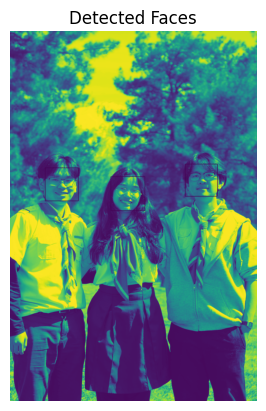

In [11]:
gray = cv2.cvtColor(group0, cv2.COLOR_BGR2GRAY)

# init face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(group0, scaleFactor=1.1, minNeighbors=10, minSize=(100, 100))

# draw rectangles around each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the result
plt.imshow(gray)
plt.axis("off")
plt.title("Detected Faces")
plt.show()